In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Load the dataset
df = pd.read_csv("stock_tweets.csv")
df.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [2]:
# Step 2: Check structure and missing values
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Shape: (80793, 4)

Columns: ['Date', 'Tweet', 'Stock Name', 'Company Name']

Data Types:
 Date            object
Tweet           object
Stock Name      object
Company Name    object
dtype: object

Missing Values:
 Date            0
Tweet           0
Stock Name      0
Company Name    0
dtype: int64


In [3]:
# Step 3: Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dtypes

Date            datetime64[ns, UTC]
Tweet                        object
Stock Name                   object
Company Name                 object
dtype: object

In [4]:
# Step 4: Extract date/time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()
df.head()

,Date,Tweet,Stock Name,Company Name,Year,Month,Day,Hour,Weekday
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",2022,9,29,23,Thursday
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",2022,9,29,23,Thursday
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",2022,9,29,23,Thursday
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",2022,9,29,22,Thursday
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",2022,9,29,22,Thursday


In [5]:
# Step 5: Clean the Tweet Text
def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)           # Remove URLs
    text = re.sub(r"@\w+", "", text)              # Remove mentions
    text = re.sub(r"#\w+", "", text)              # Remove hashtags
    text = re.sub(r"[^A-Za-z0-9\s]+", "", text)   # Remove special characters
    return text.lower().strip()

df['Clean_Tweet'] = df['Tweet'].apply(clean_tweet)
df.head()

,Date,Tweet,Stock Name,Company Name,Year,Month,Day,Hour,Weekday,Clean_Tweet
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",2022,9,29,23,Thursday,mainstream media has done an amazing job at br...
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",2022,9,29,23,Thursday,tesla delivery estimates are at around 364k fr...
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",2022,9,29,23,Thursday,3 even if i include 630m unvested rsus as of 6...
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",2022,9,29,22,Thursday,hahaha why are you still trying to stop tesla ...
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",2022,9,29,22,Thursday,stop trying to kill kids you sad deranged old man


In [6]:
# Step 6: Calculate Sentiment Scores
df['Polarity'] = df['Clean_Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['Clean_Tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
print("👉 Data Sample after Preprocessing :")
df.head()


👉 Data Sample after Preprocessing :


,Date,Tweet,Stock Name,Company Name,Year,Month,Day,Hour,Weekday,Clean_Tweet,Polarity,Subjectivity
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",2022,9,29,23,Thursday,mainstream media has done an amazing job at br...,0.600000,0.900000
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",2022,9,29,23,Thursday,tesla delivery estimates are at around 364k fr...,0.000000,0.000000
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",2022,9,29,23,Thursday,3 even if i include 630m unvested rsus as of 6...,0.018182,0.277273
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",2022,9,29,22,Thursday,hahaha why are you still trying to stop tesla ...,0.066667,0.433333
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",2022,9,29,22,Thursday,stop trying to kill kids you sad deranged old man,-0.200000,0.600000


In [7]:
# Step 7: Encode text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Clean_Tweet'][:5000])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [8]:

# Output samples
print("\n👉 Processed Data Sample:")
df[['Date', 'Stock Name', 'Clean_Tweet', 'Polarity', 'Subjectivity']].head()


👉 Processed Data Sample:


,Date,Stock Name,Clean_Tweet,Polarity,Subjectivity
0,2022-09-29 23:41:16+00:00,TSLA,mainstream media has done an amazing job at br...,0.600000,0.900000
1,2022-09-29 23:24:43+00:00,TSLA,tesla delivery estimates are at around 364k fr...,0.000000,0.000000
2,2022-09-29 23:18:08+00:00,TSLA,3 even if i include 630m unvested rsus as of 6...,0.018182,0.277273
3,2022-09-29 22:40:07+00:00,TSLA,hahaha why are you still trying to stop tesla ...,0.066667,0.433333
4,2022-09-29 22:27:05+00:00,TSLA,stop trying to kill kids you sad deranged old man,-0.200000,0.600000


In [9]:
print("\n👉 TF-IDF Feature Sample:")
tfidf_df.head()


👉 TF-IDF Feature Sample:


,2022,aapl,about,after,all,amp,an,and,are,as,...,week,what,when,will,with,would,year,years,you,your
0,0.0,0.0,0.0,0.0,0.0,0.532757,0.188249,0.00000,0.000000,0.00000,...,0.0,0.187208,0.0,0.0,0.152401,0.00000,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.505253,0.00000,...,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.23333,...,0.0,0.000000,0.0,0.0,0.000000,0.26858,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.18908,0.278447,0.00000,...,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.266738,0.360224
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.861102,0.000000


## EDA :-

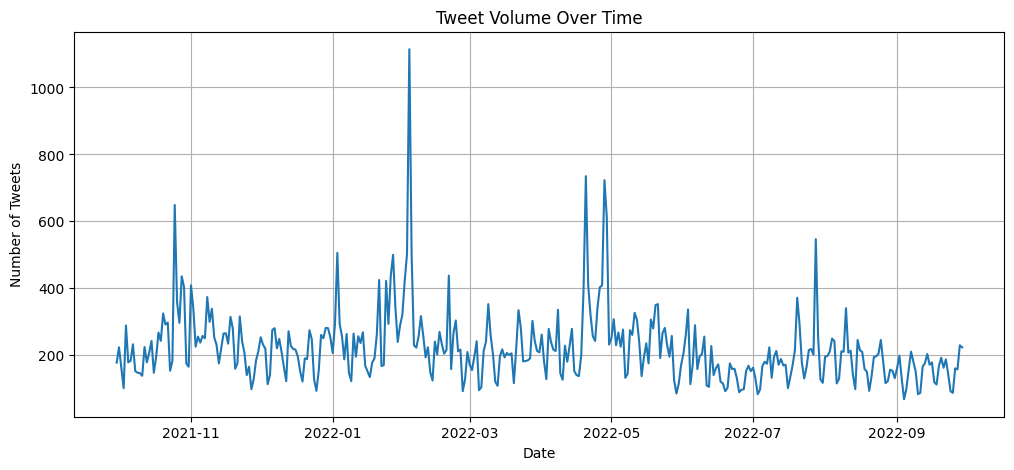

In [10]:
df['Date_only'] = df['Date'].dt.date
tweet_volume = df.groupby('Date_only').size()

plt.figure(figsize=(12, 5))
tweet_volume.plot()
plt.title("Tweet Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.grid(True)

plt.show()

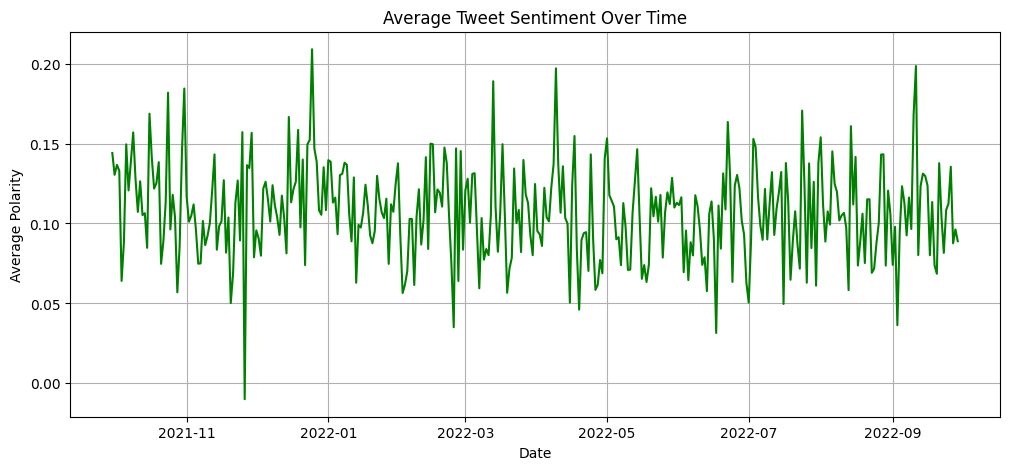

In [11]:
daily_sentiment = df.groupby('Date_only')['Polarity'].mean()

plt.figure(figsize=(12, 5))
daily_sentiment.plot(color='green')
plt.title("Average Tweet Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Polarity")
plt.grid(True)
plt.show()


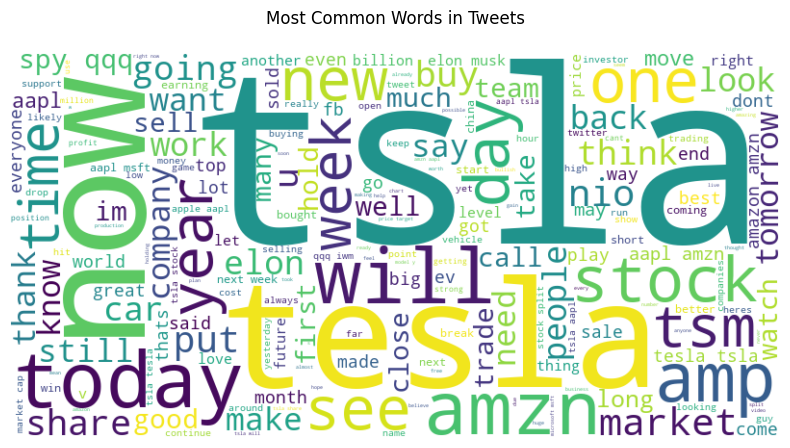

In [12]:
from wordcloud import WordCloud

text_combined = ' '.join(df['Clean_Tweet'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Tweets\n")
plt.show()


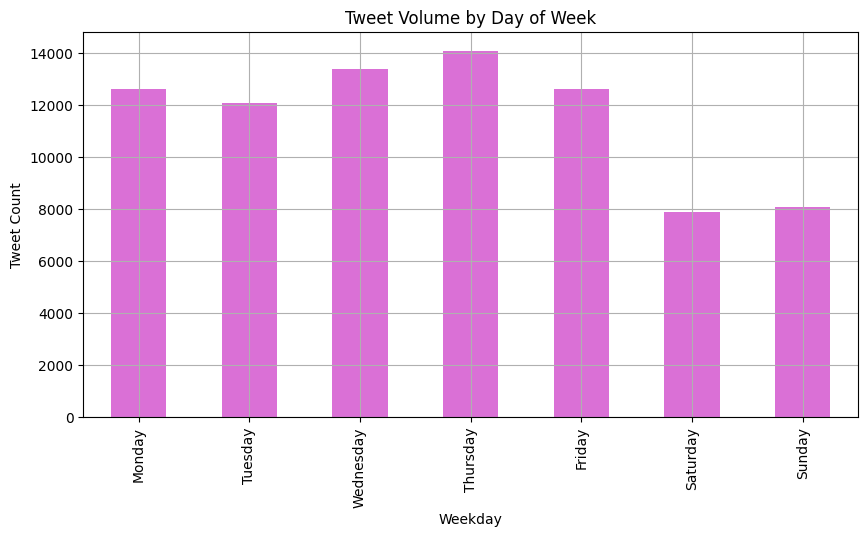

In [13]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = df['Weekday'].value_counts().reindex(weekday_order)

plt.figure(figsize=(10, 5))
weekday_counts.plot(kind='bar', color='orchid')
plt.title("Tweet Volume by Day of Week")
plt.xlabel("Weekday")
plt.ylabel("Tweet Count")
plt.grid(True)
plt.show()
